<h1 align='center'> 영상처리 프로그래밍 실습 6</h1>

<h6 align='right'> 2022. 4. 14. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;이은재&nbsp;          학번:    &nbsp;20185158&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 4월 18일 (월) 오후 6:00까지 최종본을 SmartLEAD제출


In [1]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.5.5
NumPy version 1.22.3


## 지난 주 문제 1.

다음 조건을 모두 만족하는 프로그램을 작성하라.

- 'clock_150.jpg' 파일을 읽고, cv2.imshow 함수를 이용하여 "Clock" title을 가진 윈도우에 영상을 표시한다.
- "Clock" 윈도우 위에 마우스 오른쪽 버튼을 누르면 영상이 가로 세로 방향으로 조금씩 확대된다. 단, 최대 5 배 이상을 넘으면 더 이상 영상은 확대되지 않는다.
- "Clock" 윈도우 위에 마우스 왼쪽 버튼을 누르면 영상이 가로 세로 방향으로 조금씩 축소된다. 단, 원래 영상 크기보다 작아지면 안된다.
- 다음 숫자를 누르면 영상 확대 시 interpolation 옵션은 키보드의 숫자를 눌러서 지정한다.
  - 1: Nearest-neighbor interpolation
  - 2: Bilinear interpolation
  - 3: Cubic interpolation 

In [5]:
def onMouse(event, x, y, flags, param):
    global img2, val
     
    if event == cv2.EVENT_RBUTTONDOWN:
        if val < MAX_VAL:
            val = val + 1
    elif event == cv2.EVENT_LBUTTONDOWN:
        if val > 1: 
            val = val - 1
    width = img.shape[1]*val
    height = img.shape[0]*val
    cv2.resizeWindow(winName, width, height)
    img2 = cv2.resize(img, (height, width), cv2.INTER_LINEAR)
    cv2.imshow(winName, img2)


def get_top_left_coordinate(val):
    space_x = (WIDTH - img.shape[1]*val)
    space_y = (HEIGHT - img.shape[0]*val)
    return space_x//2, space_y//2


file_name = 'clock_150.jpg'
img = cv2.imread(file_name)
val = 1
MAX_VAL = 5

img2 = img.copy()

winName = "Up-sampling an image"
cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )
cv2.imshow(winName, img2)

cv2.setMouseCallback(winName, onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 예제 1. 
bird.jpg' 파일을 읽고, 이 영상의 R, G, B 성분의 히스토그램을 그래프로 표시하라.
### 1.1 NumnPy 배열로부터 직접 히스토그램을 구하는 방법


In [2]:
bird = cv2.imread('bird.png')

In [3]:
bird.shape

(425, 640, 3)

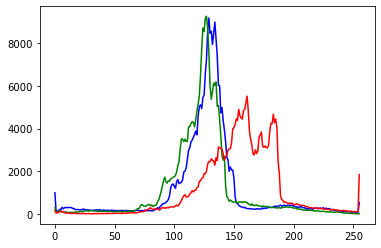

In [45]:
hist_B = 
hist_G = 
hist_R = 

plt.plot(range(256), hist_B, 'b')
plt.plot(range(256), hist_G, 'g')
plt.plot(range(256), hist_R, 'r')
plt.show()

### 1.2 skimage.exposure 모듈의 histogram을 이용한 방법

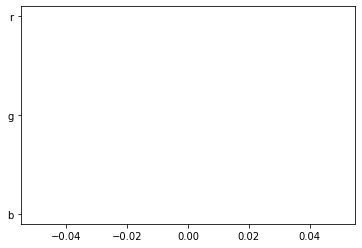

In [6]:
from skimage.exposure import histogram


plt.plot( 'b')
plt.plot( 'g')
plt.plot( 'r')
plt.show()


### 1.3 OpenCV의 calcHist를 이용한 방법

In [56]:
help(cv2.calcHist)

Help on built-in function calcHist:

calcHist(...)
    calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
    .   @overload



In [74]:
hist_B = cv2.calcHist()
hist_G = cv2.calcHist()
hist_R = cv2.calcHist()

In [75]:
hist_B.shape

(256, 1)

In [ ]:
plt.plot(range(256), hist_B, 'b')
plt.plot(range(256), hist_G, 'g')
plt.plot(range(256), hist_R, 'r')
plt.show()

## 예제 2.
영상의 로그 변환은 다음과 같은 식으로 표현된다.

$$ g(x,y) = \frac{255}{\log(1+\max\{f(x,y)\}} \log\{1+f(x,y)\}$$

### 2.1 
로그 변환 함수의 그래프를 그려라.

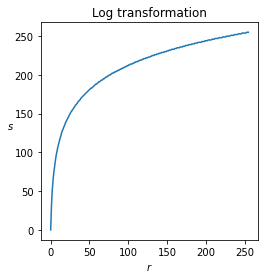

In [100]:
def log_transformation(r):
    
    return s


plt.show()

### 2.2 
Lookup table 방식을 이용한 로그 변환 함수를 작성하라.

### 2.3 
- bird.png, forest.jpg, grass.jpg 영상에 log 변환을 적용한 후에 원 영상과 변환 영상을 나란히 표시하라. (단, BGR 영상을 다음 몇 가지 color 공간으로 변환한 후에 특정 성분만 변환한 후에 다시 BGR 성분으로 변환하는 방법도 사용하라.)
  - RGB
  - Luv
  - Lab
  - YUV

- 위에서 사용한 변환 전 후 영상의 R, G, B 성분별 히스토그램을 비교하라.

In [108]:
cv2dir = dir(cv2)
[e for e in cv2dir if 'COLOR_' in e]

['CAP_PROP_XI_COLOR_FILTER_ARRAY',
 'COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_

In [ ]:
bird = cv2.imread('bird.png')



## 예제 3.
영상의 gamma 변환은 다음과 같은 식으로 표현된다.

$$s = 255^{1-\gamma} c^\gamma$$

### 2.1 
아래 gamma 값에 대해서 감마 변환 함수의 그래프를 그려라.

$$\gamma = 1/4, 1/3, 1/2, 1, 3/2, 2, 5/2$$

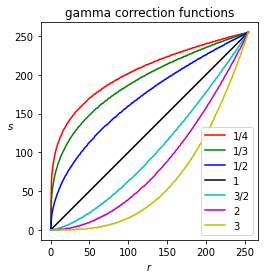

In [165]:
def gamma_transformation_LUT(gamma):


### 3.2
cv2.imread 함수를 이용해서 'grass.jpg' 파일을 읽고, gamma 값을 조정하면서 gamma 변환한 영상을 표시하라.

In [166]:
grass = cv2.imread('grass.jpg')

In [ ]:
lut = gamma_transformation_LUT(

grass_YUV = cv2.cvtColor(grass, cv2.COLOR_BGR2YUV)
grass_YUV[...,0] = lut_transformation(grass_YUV[...,0], lut_log)
grass_YUV_log = cv2.cvtColor(grass_YUV, cv2.COLOR_YUV2BGR)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(grass[:,:,::-1])
plt.subplot(122)
plt.imshow(grass_YUV_log[:,:,::-1])
plt.show()


In [ ]:
help(cv2.circle)

## 예제 4.
다음 세 가지 방법으로 구현한 감마 변환 함수의 평균 실행 시간을 비교하는 프로그램을 작성하라.
- 영상을 표현하는 NumPy 배열에 직접 감마 변환 연산을 적용하는 경우
- NumPY 배열로 lookup table을 만들고, boolean indexing을 이용하는 경우
- OpenCV의 LUT 함수를 사용하는 경우

## 예제 5.
- 'basement.jpg' 파일을 읽고 히스토그램 평활화를 적용한 영상을 만들고, 원 영상과 나란히 표시하라.
  - 컬러 영상을 직접 히스토그램 평활화한 영상과 컬러 공간을 변경한 후에 특정 성분에만 히스토그램 평활화한 영상과 특성을 비교하라.
- 히스토그램 평활화 전, 후의 영상의 컬러 히스토그램을 그려라.

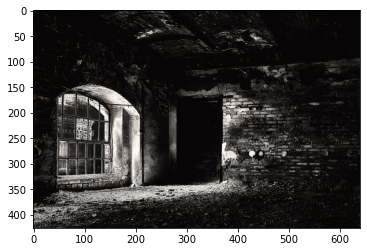

In [175]:
basement = cv2.imread('basement.jpg')
plt.imshow(basement[...,::-1])

## 문제 1.
오늘 실습에서 사용한 적당한 영상을 하나 읽어서 OpenCV를 이용해서 영상을 표시하는 윈도우를 만들고 slidebar 인터페이스를 사용하여 감마 변환의 gamma를 0.1부터 5 사이로 조절할 수 있도록 하고, 감마가 변경될 때마다 윈도우에 감마 변환된 영상이 표시되는 프로그램을 작성하라.